<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Time series exercises

--- 

<h1>Lab Guide<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#1.-Load-the-CRSP-daily-returns.-Fit-an-ARMA-model-to-the-GE-column-and-tune-the-parameters." data-toc-modified-id="1.-Load-the-CRSP-daily-returns.-Fit-an-ARMA-model-to-the-GE-column-and-tune-the-parameters.-1">1. Load the CRSP daily returns. Fit an ARMA model to the GE column and tune the parameters.</a></span><ul class="toc-item"><li><span><a href="#Bonus:-Fit-also-the-other-columns." data-toc-modified-id="Bonus:-Fit-also-the-other-columns.-1.1">Bonus: Fit also the other columns.</a></span></li><li><span><a href="#Obtain-a-date-index-by-combining-the-year,-month-and-day-data." data-toc-modified-id="Obtain-a-date-index-by-combining-the-year,-month-and-day-data.-1.2">Obtain a date index by combining the year, month and day data.</a></span></li><li><span><a href="#Plot-the-timeseries-and-the-(partial)-autocorrelations" data-toc-modified-id="Plot-the-timeseries-and-the-(partial)-autocorrelations-1.3">Plot the timeseries and the (partial) autocorrelations</a></span></li><li><span><a href="#Fit-an-ARIMA-model" data-toc-modified-id="Fit-an-ARIMA-model-1.4">Fit an ARIMA model</a></span></li><li><span><a href="#Do-the-same-with-the-CRSP-data" data-toc-modified-id="Do-the-same-with-the-CRSP-data-1.5">Do the same with the CRSP data</a></span></li></ul></li><li><span><a href="#Load-the-Mishkin-dataset." data-toc-modified-id="Load-the-Mishkin-dataset.-2">Load the Mishkin dataset.</a></span><ul class="toc-item"><li><span><a href="#Bonus:-Use-also-the-columns-on-one-month-inflation-rate-(pai1)-and-consumer-price-index-for-urban-consumers-(cpi)." data-toc-modified-id="Bonus:-Use-also-the-columns-on-one-month-inflation-rate-(pai1)-and-consumer-price-index-for-urban-consumers-(cpi).-2.1">Bonus: Use also the columns on one-month inflation rate (pai1) and consumer price index for urban consumers (cpi).</a></span></li><li><span><a href="#Plot-the-time-series-for-the-tb1-data-before-and-after-taking-the-logarithm,-and-plot-it-together-with-the-one-or-two-times-differenced-timeseries" data-toc-modified-id="Plot-the-time-series-for-the-tb1-data-before-and-after-taking-the-logarithm,-and-plot-it-together-with-the-one-or-two-times-differenced-timeseries-2.2">Plot the time series for the tb1 data before and after taking the logarithm, and plot it together with the one or two times differenced timeseries</a></span></li><li><span><a href="#Plot-the-(partial)-autocorrelations-before-and-after-differencing-and-compare" data-toc-modified-id="Plot-the-(partial)-autocorrelations-before-and-after-differencing-and-compare-2.3">Plot the (partial) autocorrelations before and after differencing and compare</a></span></li><li><span><a href="#Select-the-best-model-order-according-to-AIC-and-cross-validation-and-compare" data-toc-modified-id="Select-the-best-model-order-according-to-AIC-and-cross-validation-and-compare-2.4">Select the best model order according to AIC and cross validation and compare</a></span></li></ul></li></ul></div>

In [24]:
import statsmodels.api as sm
from statsmodels.tsa.arima_model import ARIMA, ARMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
sns.set(font_scale=1.5)
%matplotlib inline

sns.set(font_scale=1.5)
plt.style.use('fivethirtyeight')

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

### 1. Load the CRSP daily returns. Fit an ARMA model to the GE column and tune the parameters.

#### Bonus: Fit also the other columns.

#### Obtain a date index by combining the year, month and day data.

In [17]:
data = sm.datasets.get_rdataset('CRSPday', package='Ecdat')

In [18]:
print(data.__doc__)

+---------+-----------------+
| CRSPday | R Documentation |
+---------+-----------------+

Daily Returns from the CRSP Database
------------------------------------

Description
~~~~~~~~~~~

daily observations from 1969-1-03 to 1998-12-31

*number of observations* : 2528

*observation* : production units

*country* : United States

Usage
~~~~~

::

   data(CRSPday)

Format
~~~~~~

A dataframe containing :

year
   the year

month
   the month

day
   the day

ge
   the return for General Electric, Permno 12060

ibm
   the return for IBM, Permno 12490

mobil
   the return for Mobil Corporation, Permno 15966

crsp
   the return for the CRSP value-weighted index, including dividends

Source
~~~~~~

Center for Research in Security Prices, Graduate School of Business,
University of Chicago, 725 South Wells - Suite 800, Chicago, Illinois
60607, http://www.crsp.com.

References
~~~~~~~~~~

Davidson, R. and James G. MacKinnon (2004) *Econometric Theory and
Methods*, New York, Oxford University

In [19]:
df = data.data
df.head()

,year,month,day,ge,ibm,mobil,crsp
0,1989,1,3,-0.016760,0.000000,-0.002747,-0.007619
1,1989,1,4,0.017045,0.005128,0.005510,0.013016
2,1989,1,5,-0.002793,-0.002041,0.005479,0.002815
3,1989,1,6,0.000000,-0.006135,0.002725,0.003064
4,1989,1,9,0.000000,0.004115,0.005435,0.001633


In [20]:
df.index = pd.to_datetime(df.loc[:,'year':'day'])
df.head()

,year,month,day,ge,ibm,mobil,crsp
1989-01-03,1989,1,3,-0.016760,0.000000,-0.002747,-0.007619
1989-01-04,1989,1,4,0.017045,0.005128,0.005510,0.013016
1989-01-05,1989,1,5,-0.002793,-0.002041,0.005479,0.002815
1989-01-06,1989,1,6,0.000000,-0.006135,0.002725,0.003064
1989-01-09,1989,1,9,0.000000,0.004115,0.005435,0.001633


/Users/Noah/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/Users/Noah/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/tsatools.py:668: RuntimeWarning: invalid value encountered in true_divide
  newparams = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
/Users/Noah/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/tsatools.py:669: RuntimeWarning: invalid value encountered in true_divide
  tmp = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
/Users/Noah/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/tsatools.py:695: RuntimeWarning: divide by zero encountered in true_divide
  invmacoefs = -np.log((1-macoefs)/(1+macoefs))
/Users/Noah/anaconda3/lib/python3.7/site-packages/statsmodels/tools/numdiff.py:243: RuntimeWarning: invalid value encountered in add
  **kwargs)).imag/2./hess[i, j]
/Users/Noah/anaconda3/lib/python3.7/site-pa

{'aic':               0             1             2             3
0           NaN -14493.249198 -14491.467620 -14491.045260
1 -13427.388986 -14491.456939 -14489.877935 -14487.899264
2 -13714.747394 -14490.989730 -14491.981711           NaN
3 -13903.583129 -14490.753097 -14489.983759 -14488.761094
4 -14008.770520 -14488.777972 -14487.584304 -14487.396116, 'bic':               0             1             2             3
0           NaN -14481.579621 -14473.963256 -14467.706108
1 -13415.719410 -14473.952575 -14466.538783 -14458.725324
2 -13697.243030 -14467.650578 -14462.807770           NaN
3 -13880.243977 -14461.579156 -14454.975030 -14447.917577
4 -13979.596579 -14453.769243 -14446.740788 -14440.717811, 'aic_min_order': (0, 1), 'bic_min_order': (0, 1)}


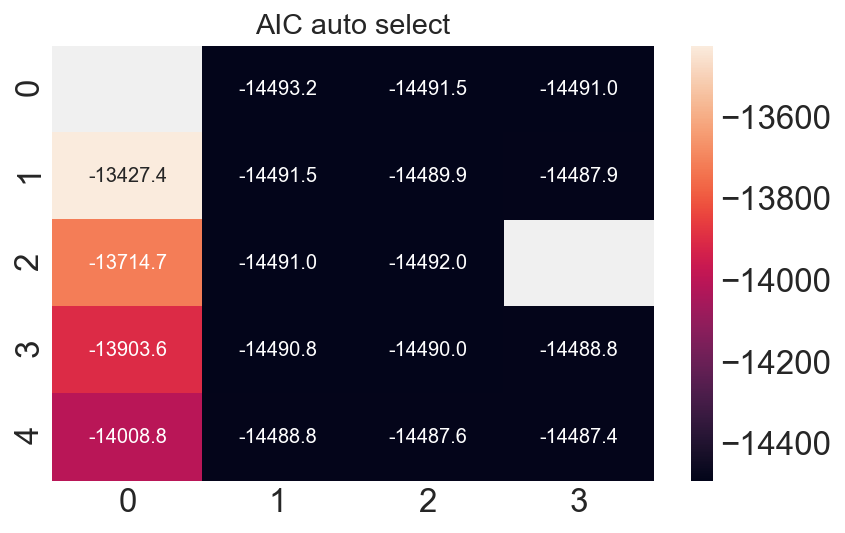

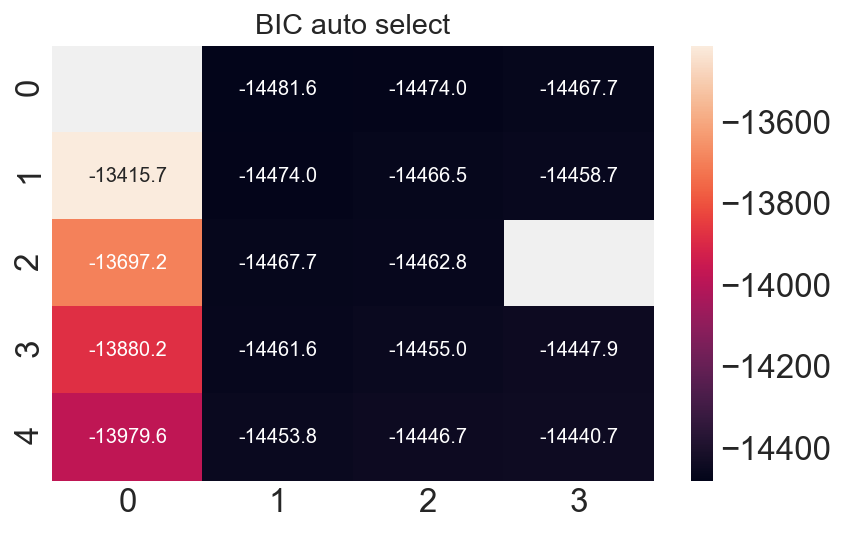

In [22]:
from statsmodels.tsa import stattools

auto_select = stattools.arma_order_select_ic(
    df['ge'].diff()[1:], max_ar=4, max_ma=3, ic=['aic', 'bic'], trend='nc') # feed the diff always to fight
# stationarity, whereas ARIMA did it automatically within the function.

print(auto_select)

sns.heatmap(auto_select['aic'], annot=True, fmt='.1f')
plt.ylim([auto_select['aic'].shape[1]+1, 0])
plt.title('AIC auto select')
plt.show()

sns.heatmap(auto_select['bic'], annot=True, fmt='.1f')
plt.ylim([auto_select['bic'].shape[1]+1, 0])
plt.title('BIC auto select')
plt.show()

In [63]:
model = ARMA(df['ge'], order=(0, 1))
result = model.fit(start_params=[0],
                   solver='lbfgs', method='css-mle', trend='nc', ic='BIC')
# without setting start_params it might not succeed in finding the MLE
# requires as many start_params as model parameters, i.e. p+q
result.summary2()

/Users/Noah/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


<class 'statsmodels.iolib.summary2.Summary'>
"""
                            Results: ARMA
=====================================================================
Model:              ARMA             BIC:                 -14480.8062
Dependent Variable: ge               Log-Likelihood:      7248.2     
Date:               2020-02-13 16:20 Scale:               1.0000     
No. Observations:   2528             Method:              css-mle    
Df Model:           1                Sample:              0          
Df Residuals:       2527                                  8          
Converged:          1.0000           S.D. of innovations: 0.014      
No. Iterations:     3.0000           HQIC:                -14488.242 
AIC:                -14492.4766                                      
-----------------------------------------------------------------------
                Coef.    Std.Err.      t      P>|t|     [0.025   0.975]
-----------------------------------------------------------------------
ma.L1.ge       -0.0034     0.0203   -0.1687   0.8661   -0.0432   0.0363
------------------------------------------------------------------------------
                Real            Imaginary          Modulus           Frequency
------------------------------------------------------------------------------
MA.1          292.3720             0.0000          292.3720             0.0000
=====================================================================

"""

#### Plot the timeseries and the (partial) autocorrelations

Compare before and after differencing. Do you think that your model will require differencing?

In [55]:
df['ge_diff'] = df['ge'].diff()

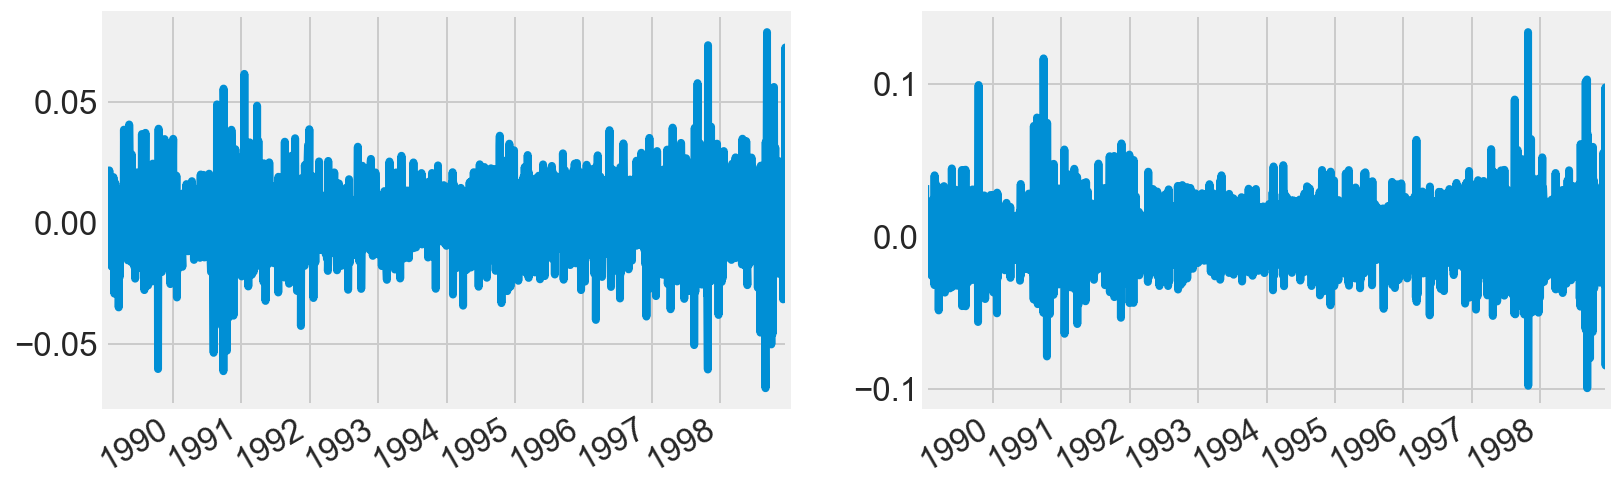

In [56]:
fig, ax = plt.subplots(ncols=2, figsize=(12, 4))
df['ge'].plot(ax=ax[0])
df['ge_diff'].plot(ax=ax[1]);

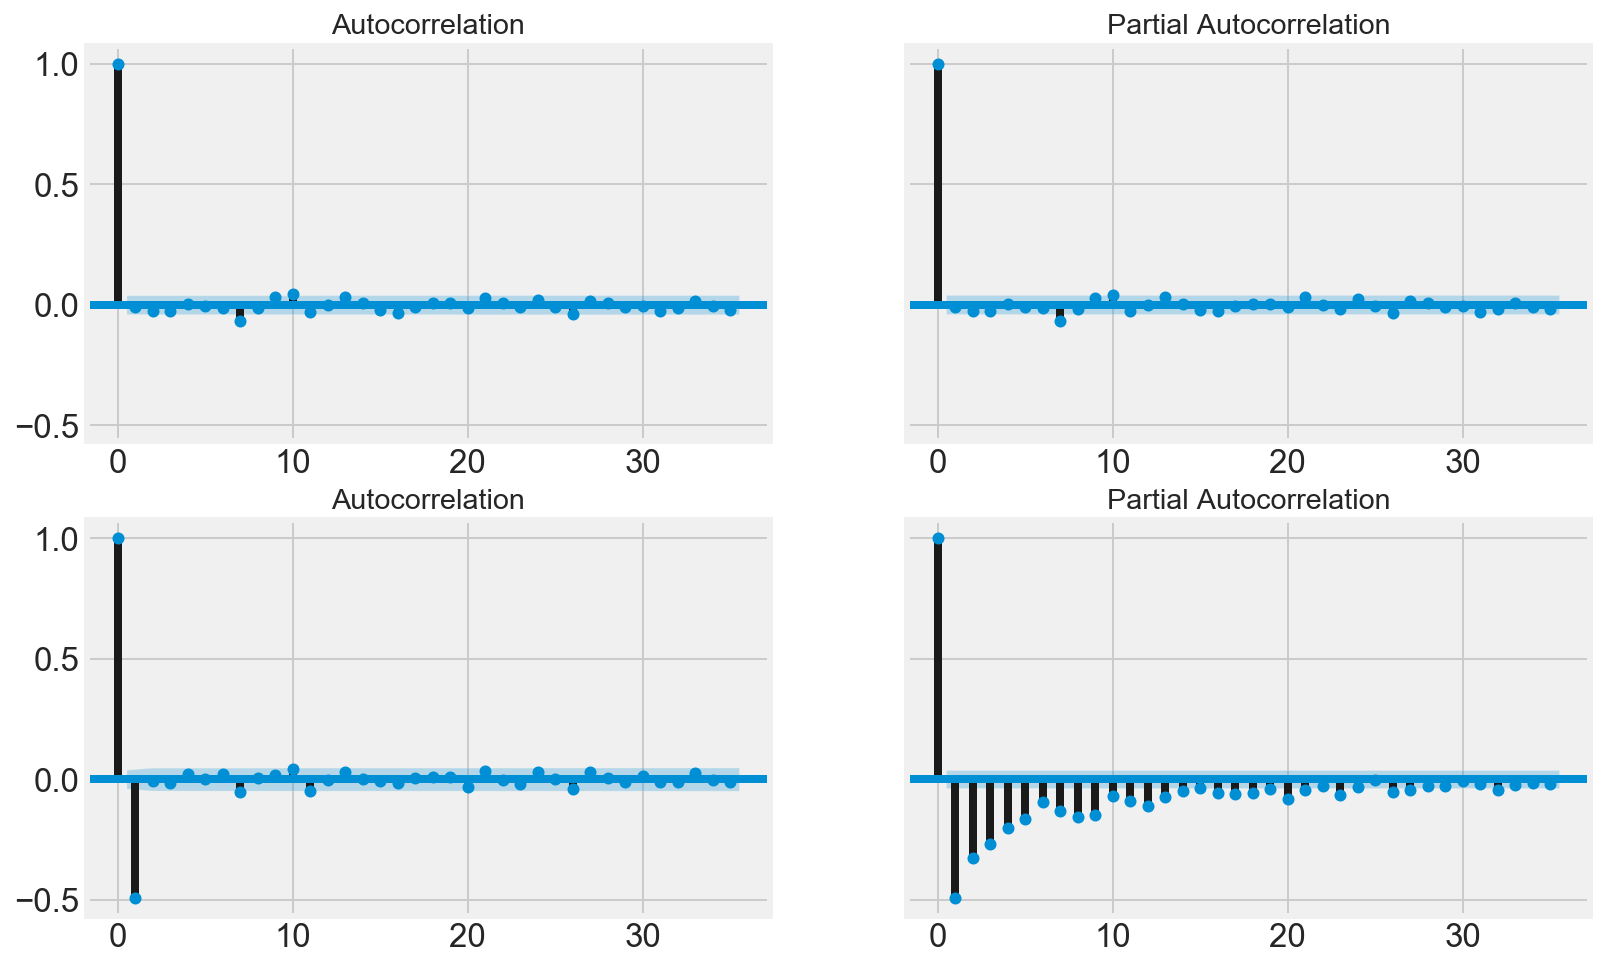

In [66]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(12, 8), sharey=True)
plot_acf(df['ge'], ax=ax[0,0])
plot_pacf(df['ge'], ax=ax[0,1])
plot_acf(df['ge_diff'][1:], ax=ax[1,0])
plot_pacf(df['ge_diff'][1:], ax=ax[1,1]);

#### Fit an ARIMA model

1. Use automatic selection based on AIC to select the best model order
2. Use cross validation to select the best model order and compare

/Users/Noah/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/Users/Noah/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/Users/Noah/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


{'aic':               0             1             2
0           NaN -14493.249198 -14491.467620
1 -13427.388986 -14491.456939 -14489.877935
2 -13714.747394 -14490.989730 -14491.981711
3 -13903.583129 -14490.753097 -14489.983759
4 -14008.770520 -14488.777972 -14487.584304, 'aic_min_order': (0, 1)}


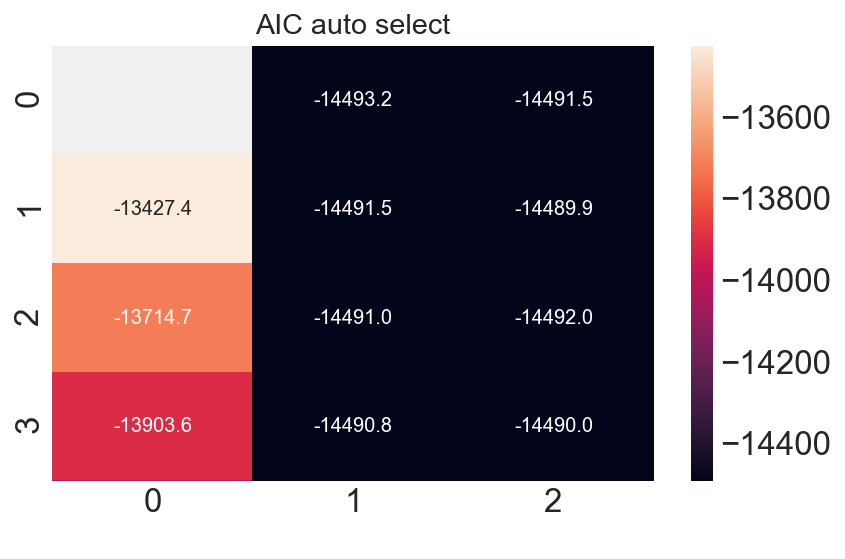

In [65]:
auto_select = stattools.arma_order_select_ic(
    df['ge'].diff()[1:], ic=['aic'], trend='nc') # feed the diff always to fight
# stationarity, whereas ARIMA did it automatically within the function.

print(auto_select)

sns.heatmap(auto_select['aic'], annot=True, fmt='.1f')
plt.ylim([auto_select['aic'].shape[1]+1, 0])
plt.title('AIC auto select')
plt.show()

#### Do the same with the CRSP data

### Load the Mishkin dataset. 

- Consider the time series of the logarithm of the tb1 (monthly one-month T-bill rates) values. 
- Judge from autocorrelation plots how much differencing is required to obtain a stationary time series. 
- Fit an ARMA model to the resulting time series. 

#### Bonus: Use also the columns on one-month inflation rate (pai1) and consumer price index for urban consumers (cpi).

In [17]:
data_1 = sm.datasets.get_rdataset('Mishkin', package='Ecdat')

/Users/crahmede/anaconda3/lib/python3.7/site-packages/statsmodels/datasets/utils.py:192: FutureWarning: `item` has been deprecated and will be removed in a future version
  return dataset_meta["Title"].item()


In [18]:
print(data_1.__doc__)

+---------+-----------------+
| Mishkin | R Documentation |
+---------+-----------------+

Inflation and Interest Rates
----------------------------

Description
~~~~~~~~~~~

monthly observations from 1950-2 to 1990-12

*number of observations* : 491

*observation* : country

*country* : United States

Usage
~~~~~

::

   data(Mishkin)

Format
~~~~~~

A time serie containing :

pai1
   one-month inflation rate (in percent, annual rate)

pai3
   three-month inflation rate (in percent, annual rate)

tb1
   one-month T-bill rate (in percent, annual rate)

tb3
   three-month T-bill rate (in percent, annual rate)

cpi
   CPI for urban consumers, all items (the 1982-1984 average is set to
   100)

Source
~~~~~~

Mishkin, F. (1992) “Is the Fisher effect for real ?”, *Journal of
Monetary Economics*, **30**, 195-215.

References
~~~~~~~~~~

Hayashi, F. (2000) *Econometrics*, Princeton University Press,
http://fhayashi.fc2web.com/hayashi_econometrics.htm, chapter 2, 176-184.

See Also
~~~~~~~~



In [19]:
dates = pd.period_range(start='1950-02-01', end='1990-12-01', freq='M')

In [20]:
df_1 = data_1.data
df_1.index = dates
df_1['tb1log'] = np.log(df_1.tb1)
df_1.head()

,pai1,pai3,tb1,tb3,cpi,tb1log
1950-02,-3.552289,1.129370,1.100854,1.129406,23.5,0.096086
1950-03,5.247540,4.001566,1.125513,1.137254,23.6,0.118239
1950-04,1.692860,4.492160,1.115715,1.142319,23.6,0.109495
1950-05,5.064298,7.817513,1.146380,1.177902,23.7,0.136609
1950-06,6.719322,9.433580,1.158520,1.167777,23.8,0.147143


#### Plot the time series for the tb1 data before and after taking the logarithm, and plot it together with the one or two times differenced timeseries

#### Plot the (partial) autocorrelations before and after differencing and compare

#### Select the best model order according to AIC and cross validation and compare